Crawling and Preparation of Geo-based Point-of-Interest Data for later analysis

In [1]:
# Defining classes and subclasses
AMENITY_CATEGORIES = {
    'cafe': 'amenity',
    'bar': 'amenity',
    'biergarten': 'amenity',
    'fast_food': 'amenity',
    'food_court': 'amenity',
    'ice_cream': 'amenity',
    'pub': 'amenity',
    'restaurant': 'amenity',
    'arts_centre': 'amenity',
    'brothel': 'amenity',
    'casino': 'amenity',
    'cinema': 'amenity',
    'community_centre': 'amenity',
    'conference_centre': 'amenity',
    'events_venue': 'amenity',
    'exhibition_centre': 'amenity',
    'fountain': 'amenity',
    'gambling': 'amenity',
    'love_hotel': 'amenity',
    'music_venue': 'amenity',
    'nightclub': 'amenity',
    'planetarium': 'amenity',
    'public_bookcase': 'amenity',
    'social_centre': 'amenity',
    'stripclub': 'amenity',
    'studio': 'amenity',
    'swingerclub': 'amenity',
    'theatre': 'amenity',
}

SHOP_CATEGORIES = {
    'alcohol': 'shop',
    'bakery': 'shop',
    'beverages': 'shop',
    'brewing_supplies': 'shop',
    'butcher': 'shop',
    'cheese': 'shop',
    'chocolate': 'shop',
    'coffee': 'shop',
    'confectionery': 'shop',
    'convenience': 'shop',
    'deli': 'shop',
    'dairy': 'shop',
    'farm': 'shop',
    'frozen_food': 'shop',
    'greengrocer': 'shop',
    'health_food': 'shop',
    'ice_cream': 'shop',
    'pasta': 'shop',
    'pastry': 'shop',
    'seafood': 'shop',
    'spices': 'shop',
    'tea': 'shop',
    'wine': 'shop',
    'water': 'shop',
    'department_store': 'shop',
    'general': 'shop',
    'kiosk': 'shop',
    'mall': 'shop',
    'supermarket': 'shop',
    'wholesale': 'shop',
    'baby_goods': 'shop',
    'bag': 'shop',
    'boutique': 'shop',
    'clothes': 'shop',
    'fabric': 'shop',
    'fashion': 'shop',
    'fashion_accessories': 'shop',
    'jewelry': 'shop',
    'leather': 'shop',
    'sewing': 'shop',
    'shoes': 'shop',
    'tailor': 'shop',
    'watches': 'shop',
    'wool': 'shop',
    'second_hand': 'shop',
    'variety_store': 'shop',
    'beauty': 'shop',
    'chemist': 'shop',
    'cosmetics': 'shop',
    'erotic': 'shop',
    'hairdresser': 'shop',
    'hairdresser_supply': 'shop',
    'hearing_aids': 'shop',
    'herbalist': 'shop',
    'massage': 'shop',
    'medical_supply': 'shop',
    'nutrition_supplements': 'shop',
    'optician': 'shop',
    'perfumery': 'shop',
    'tattoo': 'shop',
    'appliance': 'shop',
    'doityourself': 'shop',
    'electrical': 'shop',
    'energy': 'shop',
    'florist': 'shop',
    'garden_centre': 'shop',
    'gas': 'shop',
    'glaziery': 'shop',
    'groundskeeping': 'shop',
    'hardware': 'shop',
    'houseware': 'shop',
    'locksmith': 'shop',
    'paint': 'shop',
    'pottery': 'shop',
    'security': 'shop',
    'trade': 'shop',
    'windows': 'shop',
    'antiques': 'shop',
    'bed': 'shop',
    'furniture': 'shop',
    'household_linen': 'shop',
    'interior_decoration': 'shop',
    'kitchen': 'shop',
    'lighting': 'shop',
    'computer': 'shop',
    'electronics': 'shop',
    'hifi': 'shop',
    'mobile_phone': 'shop',
    'radiotechnics': 'shop',
    'telecommunication': 'shop',
    'vacuum_cleaner': 'shop',
    'atv': 'shop',
    'bicycle': 'shop',
    'boat': 'shop',
    'car': 'shop',
    'motorcycle': 'shop',
    'outdoor': 'shop',
    'scuba_diving': 'shop',
    'ski': 'shop',
    'snowmobile': 'shop',
    'sports': 'shop',
    'swimming_pool': 'shop',
    'trailer': 'shop',
    'tyres': 'shop',
    'art': 'shop',
    'camera': 'shop',
    'collector': 'shop',
    'craft': 'shop',
    'frame': 'shop',
    'games': 'shop',
    'model': 'shop',
    'music': 'shop',
    'musical_instrument': 'shop',
    'photo': 'shop',
    'trophy': 'shop',
    'video': 'shop',
    'video_games': 'shop',
    'anime': 'shop',
    'books': 'shop',
    'gift': 'shop',
    'lottery': 'shop',
    'newsagent': 'shop',
    'stationery': 'shop',
    'ticket': 'shop',
    'bookmaker': 'shop',
    'cannabis': 'shop',
    'copyshop': 'shop',
    'dry_cleaning': 'shop',
    #'e-cigarette': 'shop', -> this cost me 2 hours of debugging
    'funeral_directors': 'shop',
    'insurance': 'shop',
    'laundry': 'shop',
    'money_lender': 'shop',
    'outpost': 'shop',
    'party': 'shop',
    'pawnbroker': 'shop',
    'pest_control': 'shop',
    'pet': 'shop',
    'pet_grooming': 'shop',
    'pyrotechnics': 'shop',
    'religion': 'shop',
    'storage_rental': 'shop',
    'tobacco': 'shop',
    'toys': 'shop',
    'travel_agency': 'shop',
    'weapons': 'shop',
}

TRANSPORT_CATEGORIES = {
    'station': 'public_transport',
    'platform': 'public_transport',
    'stop_position': 'public_transport',
}


In [5]:
# Amenity/Entertainment
# Shopping
# Transportation

import overpass
import pandas as pd
from itertools import islice
import time 


api = overpass.API()
ALL_CATEGORIES = AMENITY_CATEGORIES | SHOP_CATEGORIES | TRANSPORT_CATEGORIES
bbox = "(41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438)"
QUERY_SIZE = 60
QUERY_SLEEP_SECONDS = 20 # works well, don't change anything here

data = pd.DataFrame()

# We need to split the query as to not get blocked by the OSM service
def chunks(data, size):
    it = iter(data)
    for i in range(0, len(data), size):
        yield {k:data[k] for k in islice(it, size)}

for subDictionary in chunks(ALL_CATEGORIES, QUERY_SIZE):

    query = '('

    for propertySubclass, propertyParentClass in subDictionary.items():
        query = f'{query}node[{propertyParentClass}={propertySubclass}]{bbox};'

    query = f'{query});'


    print(f'Query: {query}')
    response = dict(api.get(query))
    normalized_response = pd.json_normalize(response, record_path=[
        'features',
        ])

    data = pd.concat([data, normalized_response])
    print(f'Query completed, sleeping {QUERY_SLEEP_SECONDS} seconds to prevent rate limit')
    time.sleep(QUERY_SLEEP_SECONDS) # Sleep as to not get rate limited :(

print(f'Columns: {data.columns}')

Query: (node[amenity=cafe](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=bar](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=biergarten](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=fast_food](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=food_court](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[shop=ice_cream](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=pub](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=restaurant](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=arts_centre](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amenity=brothel](41.47566020027821,-88.36715698242186,42.154241397276955,-87.20809936523438);node[amen

KeyboardInterrupt: 

In [ ]:
data[['longitude','latitude']] = pd.DataFrame(data['geometry.coordinates'].tolist(), index=data.index)
data = data.drop_duplicates(subset=['longitude', 'latitude'], keep='first') 

# Filter Columns
filtered_data =  data[[
    'id',
    'longitude',
    'latitude',
    'properties.amenity',
    'properties.public_transport',
    'properties.shop'
]]

melted_data = pd.melt(filtered_data, id_vars=['id', 'longitude', 'latitude'], var_name='category', value_name='subclass').dropna()
melted_data.to_csv('./data/prepared/poi-data.csv')


In [4]:
import pandas as pd
melted_data = pd.read_csv('./data/prepared/poi-data.csv')

## Short analysis of the POI Data
The purpose of this section is to have some infrastructure to base a spatial analysis on.

 ![](https://miro.medium.com/v2/resize:fit:1246/1*2pK-bAH_y45Y7pZ7vgEJtQ.png)

                 Unnamed: 0  id  longitude  latitude  category  subclass
h3_hex_id_start                                                         
872664000ffffff          16  16         16        16        16        16
872664002ffffff          18  18         18        18        18        18
872664003ffffff          25  25         25        25        25        25
872664004ffffff           2   2          2         2         2         2
872664006ffffff          27  27         27        27        27        27
...                     ...  ..        ...       ...       ...       ...
872759ae8ffffff          17  17         17        17        17        17
872759ae9ffffff          26  26         26        26        26        26
872759aeaffffff          14  14         14        14        14        14
872759aebffffff           6   6          6         6         6         6
872759aeeffffff          24  24         24        24        24        24

[832 rows x 6 columns]


<Axes: >

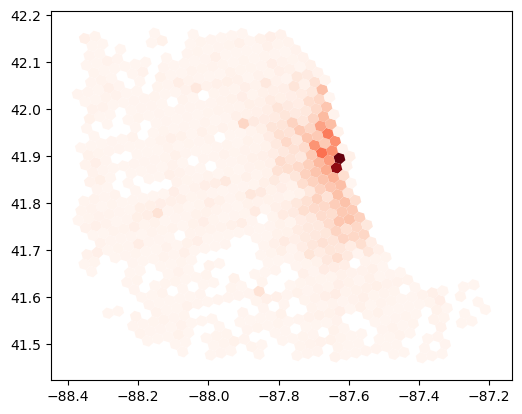

In [13]:
import h3
import geopandas 
import pandas as pd
from shapely.geometry.polygon import Polygon
import math
import matplotlib.pyplot as plt

H3_HEXAGON_RESOLUTION = 7

melted_data["h3_hex_id_start"] = melted_data.apply(lambda row: h3.geo_to_h3(row["latitude"], row["longitude"], H3_HEXAGON_RESOLUTION) if (row['latitude'] and row['longitude']) else 0, axis=1)

print(melted_data.groupby("h3_hex_id_start").count())

poi_spots = pd.DataFrame()
poi_spots = melted_data.groupby(['h3_hex_id_start']).size().reset_index(name='count')
poi_spots['geometry'] = poi_spots.apply(lambda x: Polygon(h3.h3_to_geo_boundary(x["h3_hex_id_start"], geo_json=True)), axis=1)

poi_spots_geo = geopandas.GeoDataFrame(poi_spots, geometry=poi_spots['geometry'], crs='EPSG:4326')

poi_spots_geo.plot(column='count', cmap='Reds')